# **Import**

In [ ]:
!pip install ultralytics

!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#**Dataset From Roboflow**

In [ ]:
rf = Roboflow(api_key="lg5WLG6yOfH5NkqD3hlr")
project = rf.workspace("test-0j0bi").project("accident-severity-detection-dataset-srhqy-cdypv")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Severity-Detection-Dataset-1 in yolov9:: 100%|██████████| 2456/2456 [00:00<00:00, 4040.92it/s]


# **Training Model Yolov9m**

In [ ]:
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
model = YOLO("yolov9m.pt")
results = model.train(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", epochs=50, optimizer="Adam", lr0=0.0001, imgsz=640, seed=42)

100%|██████████| 39.1M/39.1M [00:00<00:00, 180MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/content/Accident-Severity-Detection-Dataset-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       
  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       
  7                  -1  1   1556160  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.1MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-Severity-Detection-Dataset-1/train/labels... 852 images, 2 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 2016.00it/s]

train: New cache created: /content/Accident-Severity-Detection-Dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<00:00, 1377.30it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.43G      1.108       2.01      1.498         10        640: 100%|██████████| 54/54 [00:38<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        186        189      0.317      0.449      0.297       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.34G     0.9821      1.306      1.365          6        640: 100%|██████████| 54/54 [00:37<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        186        189      0.501      0.622      0.591      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.37G     0.9317       1.22      1.348          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.537      0.682      0.642      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       8.3G     0.9222      1.113       1.32          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        186        189      0.604      0.585      0.651       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.34G     0.8956      1.061      1.333         11        640: 100%|██████████| 54/54 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.595      0.762      0.685      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.32G      0.862     0.9961      1.293          9        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        186        189       0.58      0.656       0.64      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.34G     0.8616     0.9473      1.287         10        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.663      0.754      0.765      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       8.3G     0.8068     0.9223       1.27         10        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        186        189      0.726      0.671      0.737      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.34G     0.8243      0.877      1.251          8        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        186        189       0.69      0.657      0.741      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       8.3G     0.7817     0.8164      1.252         10        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]

                   all        186        189       0.55      0.653      0.685      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.34G     0.7621     0.7955      1.224          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.507      0.699      0.643      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       8.3G     0.7582     0.7968      1.237          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        186        189      0.686      0.664      0.729       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.33G      0.733     0.7538      1.208          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        186        189      0.549      0.651      0.617      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.31G     0.7184      0.742      1.204          9        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        186        189      0.727      0.681      0.717      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.33G     0.7468     0.7567      1.217          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        186        189      0.653      0.719      0.733      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       8.3G     0.7183     0.7208      1.209          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        186        189      0.724      0.734      0.764      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.33G     0.6936     0.6835      1.182          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        186        189       0.64      0.744      0.726      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.31G     0.6896     0.6378      1.164          9        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        186        189      0.663      0.589       0.68      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.33G     0.7058     0.6422      1.175         11        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.693      0.719      0.785      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       8.3G     0.7079     0.6645      1.188          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        186        189      0.683      0.667      0.704      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.34G     0.6968     0.6179      1.182         11        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.664       0.74      0.759      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       8.3G     0.6965     0.6415      1.176          6        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        186        189      0.776      0.684      0.761      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.34G     0.6716     0.6441      1.151          9        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        186        189      0.756      0.657      0.772      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.31G     0.6641     0.6229      1.162         10        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        186        189       0.67      0.709      0.756      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.33G     0.6206     0.5589      1.132          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        186        189      0.789      0.627      0.767      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       8.3G      0.652     0.5694       1.16          6        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        186        189      0.702      0.744      0.769      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.34G     0.6494     0.5507      1.168          8        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        186        189      0.716      0.658      0.747      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       8.3G     0.5998     0.5509      1.114          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        186        189      0.792      0.668      0.772      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.34G     0.5973      0.538      1.122          8        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.755       0.71      0.771      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       8.3G     0.6002      0.503      1.132          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        186        189      0.786      0.709      0.788      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.33G     0.5801     0.5049      1.109          9        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.765      0.749      0.803      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.31G     0.5905      0.497      1.111         11        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.804      0.721      0.829      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.34G     0.5958     0.4794      1.117          6        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        186        189       0.67      0.732      0.777      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       8.3G     0.5833     0.4718      1.101          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.684      0.732      0.776      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.34G     0.5942     0.4718       1.12          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        186        189      0.735      0.705       0.77       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       8.3G     0.6025     0.4834      1.123          3        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.762      0.757      0.773      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.34G     0.5745     0.4869      1.102          7        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        186        189      0.681      0.754      0.756      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.32G     0.5744     0.4422      1.102          9        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        186        189      0.694      0.713      0.763      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.34G     0.5676     0.4473      1.104          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        186        189      0.792      0.661      0.772        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       8.3G     0.5603     0.4312      1.097         11        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        186        189      0.756      0.716      0.772      0.594


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.33G     0.3818     0.2662      0.935          4        640: 100%|██████████| 54/54 [00:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        186        189      0.763      0.705      0.769      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.31G     0.3795     0.2526     0.9292          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        186        189      0.694      0.798      0.805      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.33G     0.3608     0.2166     0.9056          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        186        189      0.757      0.696      0.816      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       8.3G     0.3485     0.2247     0.9078          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.768      0.715      0.805      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.34G     0.3437     0.2151     0.8978          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        186        189      0.713       0.78        0.8      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.31G     0.3412     0.2047     0.8942          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.782      0.717       0.79      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.33G     0.3417     0.2049     0.8928          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.785      0.721      0.794       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.29G     0.3401     0.2082      0.899          5        640: 100%|██████████| 54/54 [00:35<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        186        189      0.742      0.741      0.795       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.34G     0.3273     0.1871     0.8919          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        186        189      0.767      0.717      0.795      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.31G     0.3278     0.1857     0.8894          4        640: 100%|██████████| 54/54 [00:35<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        186        189      0.762      0.727      0.801      0.635



50 epochs completed in 0.570 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]


                   all        186        189      0.664      0.784      0.816      0.645
              moderate         66         66       0.56      0.682      0.741      0.574
                severe        120        123      0.768      0.887      0.891      0.716
Speed: 0.3ms preprocess, 12.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train


# **conf=0.25**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.25)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]


                   all        186        189      0.757      0.696      0.772      0.637
              moderate         66         66      0.699      0.597      0.692      0.562
                severe        120        123      0.816      0.794      0.853      0.712
Speed: 0.4ms preprocess, 25.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8ea2defe50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.25, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<00:00, 597.81it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]


                   all        184        191      0.777      0.665      0.754      0.623
              moderate         84         84      0.747      0.536      0.653      0.537
                severe        100        107      0.806      0.794      0.855      0.708
Speed: 0.3ms preprocess, 25.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8ea2263df0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.25, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 2 moderates, 40.3ms
Speed: 5.2ms preprocess, 40.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

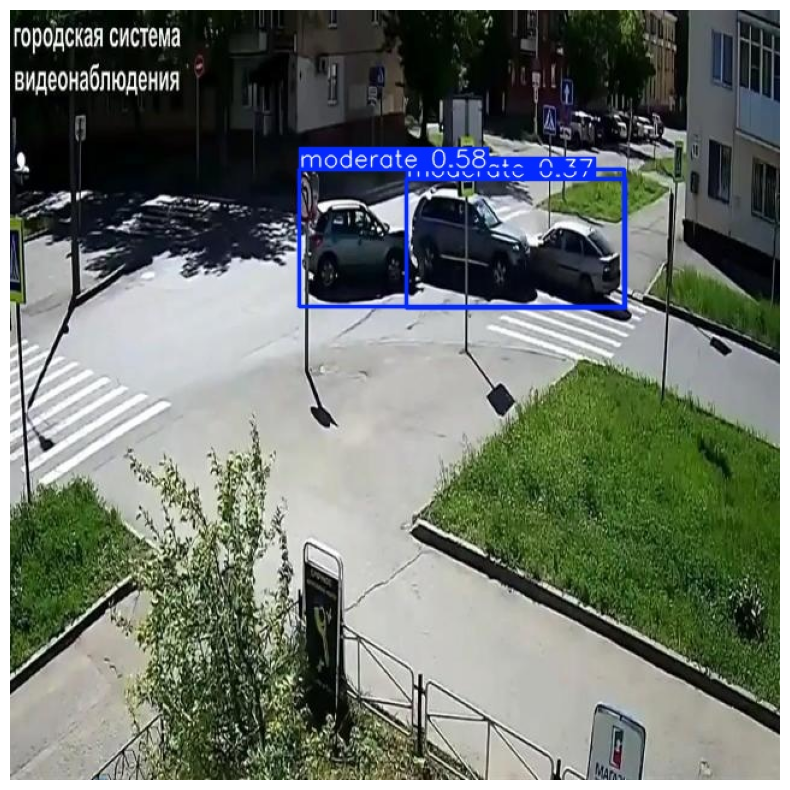

In [ ]:
image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

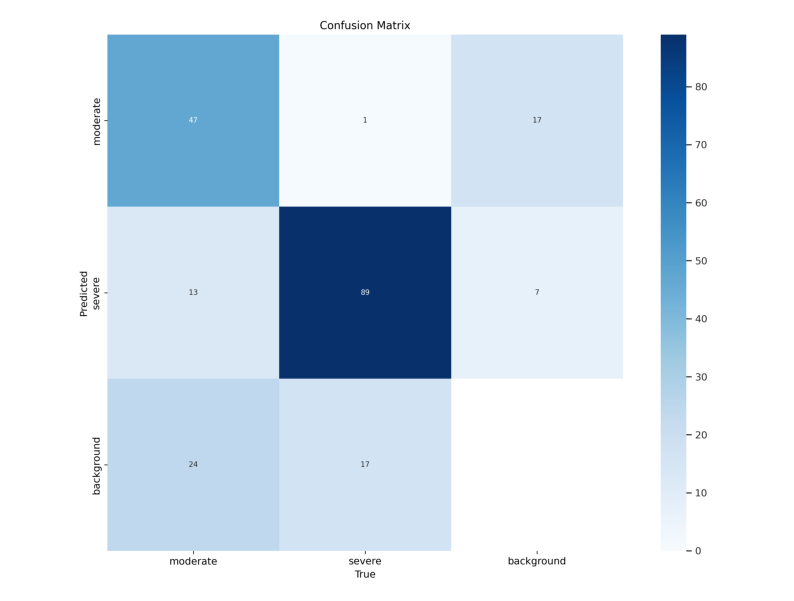

In [ ]:
image_path = '/content/runs/detect/val2/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# **conf=0.5**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.5)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]


                   all        186        189      0.773      0.678       0.77      0.638
              moderate         66         66      0.704      0.576      0.696      0.569
                severe        120        123      0.842       0.78      0.843      0.706
Speed: 0.3ms preprocess, 24.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e91eedb43d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.5, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]


                   all        184        191       0.78      0.665      0.764      0.628
              moderate         84         84       0.75      0.536      0.672      0.543
                severe        100        107       0.81      0.794      0.855      0.713
Speed: 0.3ms preprocess, 24.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e91eeee3640>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.5, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

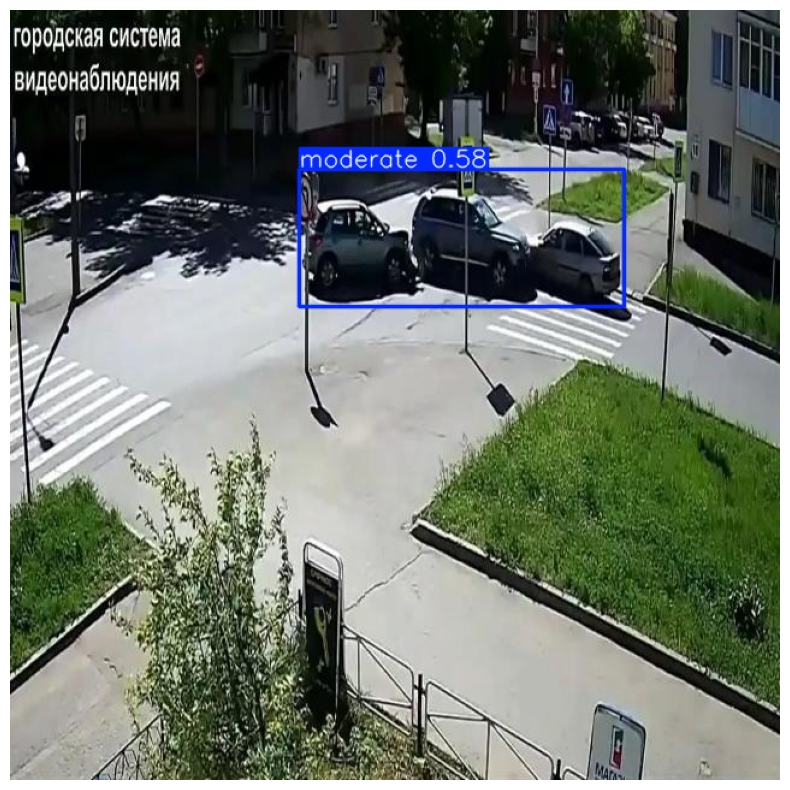

In [ ]:
image_path = "/content/runs/detect/predict2/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val4/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# **conf=0.75**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.75)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]


                   all        186        189      0.849       0.62      0.762      0.639
              moderate         66         66      0.805        0.5      0.692      0.575
                severe        120        123      0.892       0.74      0.831      0.703
Speed: 0.3ms preprocess, 24.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8ea5c6bee0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.75, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]


                   all        184        191      0.868      0.567      0.741      0.622
              moderate         84         84       0.85      0.405      0.645      0.531
                severe        100        107      0.886      0.729      0.837      0.713
Speed: 0.5ms preprocess, 24.7ms inference, 0.1ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8ea220f760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.75, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

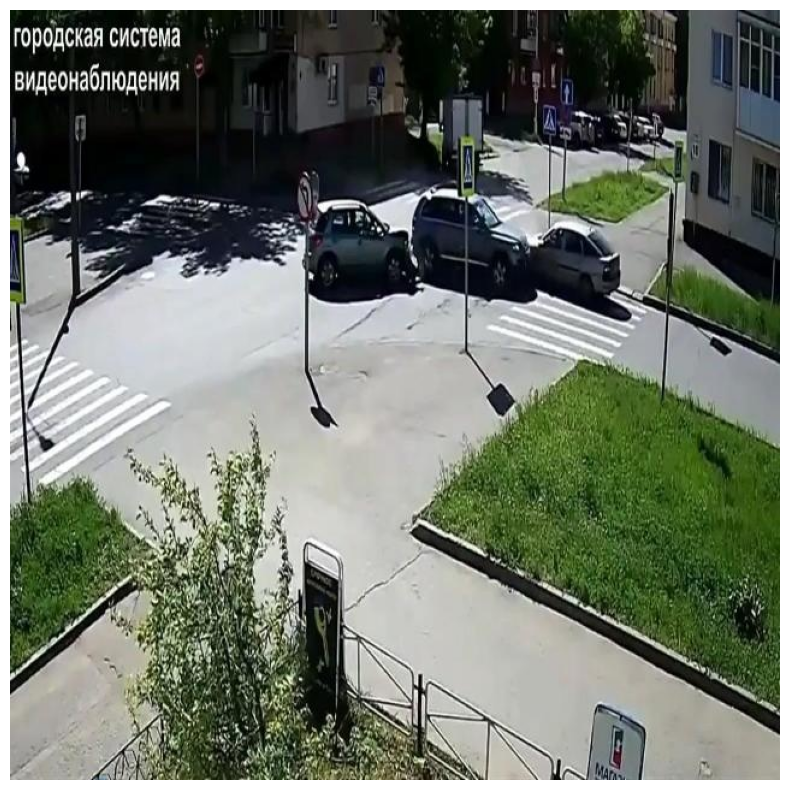

In [ ]:
image_path = "/content/runs/detect/predict3/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

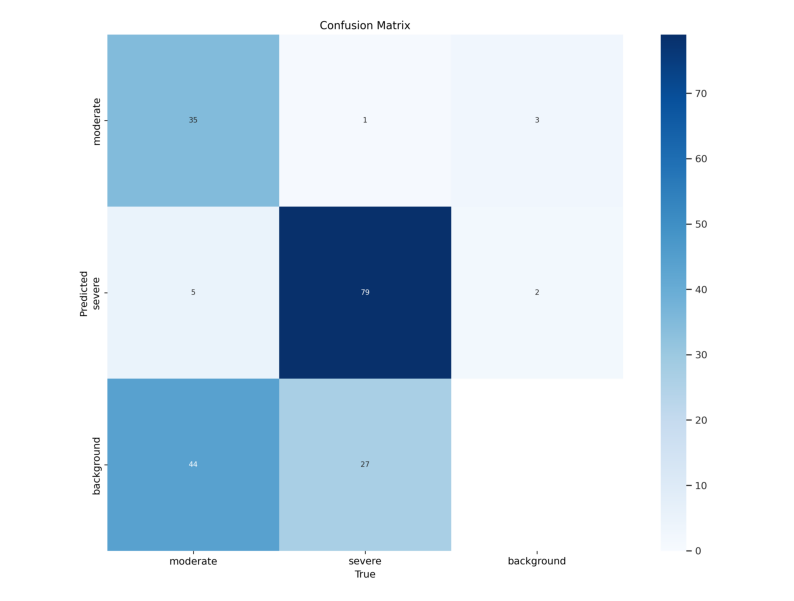

In [ ]:
image_path = '/content/runs/detect/val6/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()